In [1]:
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
#libraries

#data analytics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning tasks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [12]:
df = pd.read_csv("./Telco-Customer-Churn.csv") 
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
df.shape, df.columns
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())


In [24]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


In [25]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [27]:
log = LogisticRegression(max_iter=200)
log.fit(X_train, y_train)

pred_log = log.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, pred_log))
print(classification_report(y_test, pred_log))


Logistic Regression Accuracy: 0.8086314593980692
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1282
           1       0.67      0.57      0.62       479

    accuracy                           0.81      1761
   macro avg       0.76      0.73      0.75      1761
weighted avg       0.80      0.81      0.80      1761



C:\Users\MYPC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

Random Forest Accuracy: 0.7915956842703009
ROC-AUC Score: 0.6927540149622686
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1282
           1       0.66      0.48      0.55       479

    accuracy                           0.79      1761
   macro avg       0.74      0.69      0.71      1761
weighted avg       0.78      0.79      0.78      1761



In [30]:

# Predict churn probabilities
churn_prob = rf.predict_proba(X_test)[:,1]  

# Mark customers as "High Risk" if churn probability > 0.5
predictions = pd.DataFrame({
    "Customer_Index": X_test.index,
    "Churn_Probability": churn_prob,
    "Predicted_Churn": pred_rf
})

# Sort customers by probability of leaving (most important part)
high_risk = predictions.sort_values(by="Churn_Probability", ascending=False).head(20)
high_risk.head(10)


,Customer_Index,Churn_Probability,Predicted_Churn
1081,5782,1.000000,1
1674,5288,1.000000,1
286,6933,0.995833,1
1535,809,0.995833,1
417,534,0.990000,1
1106,4800,0.990000,1
242,1144,0.985000,1
418,2184,0.985000,1
386,5640,0.985000,1
680,2577,0.980000,1


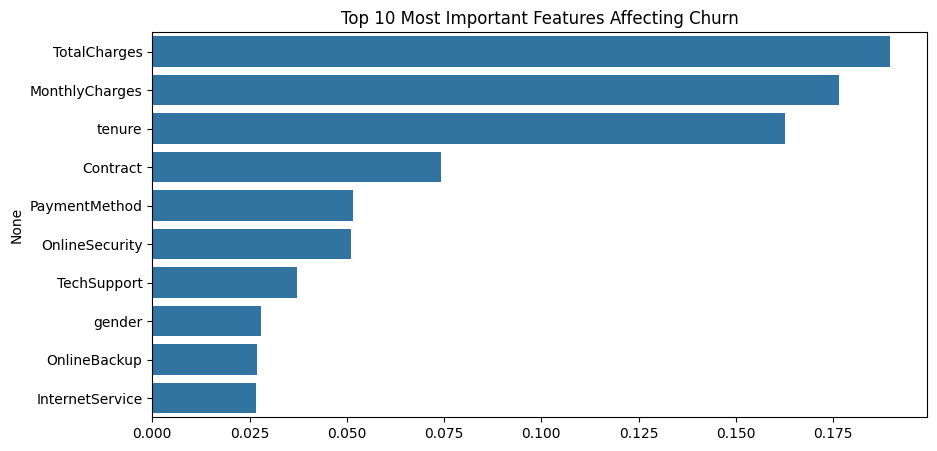

In [31]:
feat = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=feat[:10].values, y=feat[:10].index)
plt.title("Top 10 Most Important Features Affecting Churn")
plt.show()